In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os.path import join

In [2]:
files = glob(join('data/', '*.out'))

In [14]:
XPos = []
YPos = []
ZPos = []
dx = []
dy = []
dz = []

results = open('results')
for line in results:
    f = lambda x: float(x.replace("\n", ""))
    cpu_, size_, time_ = list(map(f, line.split(',')))
    XPos.append(cpu_)
    YPos.append(size_)
    ZPos.append(0)
    dx.append(0.1)
    dy.append(1)
    dz.append(time_)

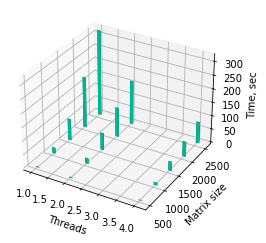

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel('Time, sec')
ax.set_ylabel('Matrix size')
ax.set_xlabel('Threads')
ax.bar3d(XPos, YPos, ZPos, dx, dy, dz, color='#00ceaa')

In [16]:
import pandas as pd

In [17]:
cl = list(map(int,set(YPos)))
cl.sort()
index = list(map(int,set(XPos)))
index.sort()

df = pd.DataFrame(columns=cl, index=index)

for i,time in enumerate(dz):
    df.loc[int(XPos[i]),int(YPos[i])] = time

In [18]:
df

,512,1024,1536,2048,2560
1,2.01121,21.5381,79.7256,189.917,320.963
2,2.667,20.6489,63.7605,110.067,163.965
4,1.38029,10.5634,33.6638,56.4122,80.3583
